In [1]:
# 아래 커맨드를 터미널에서 실행해 주세요
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# pip install lightgbm

In [2]:
import warnings
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumBarunGothic') 
warnings.simplefilter("ignore")

In [3]:
PATH = r"./datas/"

In [4]:
# source_list = os.listdir(PATH)
# source_dict = dict()
# for idx, source in enumerate(source_list):
#   source_dict[idx]=source
source_dict={0: 'RND 정보_대회용_TB_BS_RND_I.csv',
  1: '기업 경쟁력 정보_대회용_TB_BS_COMPETE_I.csv',
  2: '사업화 보유 역량_대회용_TB_BS_BIZ_I.csv',
  3: '마케팅 보유 역량_대회용_TB_BS_HR_D.csv',
  4: '평판 정보_대회용_TB_BS_RI_I.csv',
  5: '국내 시장 동향_대회용_TB_BS_DMT_I.csv',
  6: '마케팅 역량 정보_대회용_TB_BS_MR_I.csv',
  7: '비즈니스모델 정보_대회용_TB_BS_BM_I.csv',
  8: '경쟁사 현황_대회용_TB_BS_CPT_I.csv',
  9: '산업분류코드_대회용_TB_BS_CODE_C.csv',
  10: '기술기반 보유 역량_대회용_TB_BS_IP_I.csv',
  11: '인적자원 보유 역량_대회용_TB_BS_HR_I.csv',
  12: '글로벌 시장 동향_대회용_TB_BS_GMT_I.csv'}
source_list=list(source_dict.values())

In [5]:
src_dict = dict()
for source in source_list:  
  try:
    df = pd.read_csv(PATH+source, encoding="euc-kr")
  except UnicodeDecodeError:
    df = pd.read_csv(PATH+source, encoding="utf-8")
  src_dict[source.split('.')[0]]=df

In [6]:
class AnalysisBigData:
  def __init__(self, *datas):
    self.datas=datas
    self.output = None
    self.corr = None
    self.merge_datas()
  
  def merge_datas(self):
    output = None
    for data_insert in self.datas:
      data = data_insert.copy()
      data.dropna(axis=1, inplace=True)
      for col in data.columns:
        if len(data[col].value_counts())==1:
          data.drop(col,axis=1,inplace=True)
        elif data[col].dtype == 'object':
          data.drop(col,axis=1,inplace=True)
      # print(data)
      if '사업자번호' not in data.columns.values:
        print('no 사업자번호')
        continue
      if output is None:
        output = data
      else:
        output = pd.merge(output, data, on='사업자번호', how='left')
      
    output.dropna(axis=1,inplace=True)
    output.drop('사업자번호',axis=1,inplace=True)
    corr = self.heatmap_func(output)
    self.output = output

  def heatmap_func(self,data):
    corr = data.corr()
    # corr.dropna(axis=1,inplace=True)
    self.corr = corr
    plt.figure(figsize=(15, 15));
    sns.heatmap(corr,
                # vmax=0.8,
                linewidths=0.01,
                square=True,
                annot=True,
                cmap='YlGnBu');
    # plt.title(data.);
    plt.show()

  def get_data(self):
    labels = self.output.pop('최종평판점수')
    return self.output, labels
  

# 데이터별 인덱스 매칭 정보
- 0: 'RND 정보_대회용_TB_BS_RND_I.csv',
- 1: '기업 경쟁력 정보_대회용_TB_BS_COMPETE_I.csv',
- 2: '사업화 보유 역량_대회용_TB_BS_BIZ_I.csv',
- 3: '마케팅 보유 역량_대회용_TB_BS_HR_D.csv',
- 4: '평판 정보_대회용_TB_BS_RI_I.csv',
- 5: '국내 시장 동향_대회용_TB_BS_DMT_I.csv',
- 6: '마케팅 역량 정보_대회용_TB_BS_MR_I.csv',
- 7: '비즈니스모델 정보_대회용_TB_BS_BM_I.csv',
- 8: '경쟁사 현황_대회용_TB_BS_CPT_I.csv',
- 9: '산업분류코드_대회용_TB_BS_CODE_C.csv',
- 10: '기술기반 보유 역량_대회용_TB_BS_IP_I.csv',
- 11: '인적자원 보유 역량_대회용_TB_BS_HR_I.csv',
- 12: '글로벌 시장 동향_대회용_TB_BS_GMT_I.csv

      사업자번호   최종평판점수  일반 평판 점수  미래 평판 점수  사회적 책임 점수  대중 평판 점수  고용 평판 점수  \
0       956  67.8750      35.0   19.3750       13.5        55        60   
1      1603  65.7500      36.0   16.2500       13.5        50        40   
2      1614  62.5750      34.0   16.8750       11.7        50        50   
3       961  51.0250      24.0   15.6250       11.4        50        40   
4       958  61.0500      28.8   18.7500       13.5        50        44   
...     ...      ...       ...       ...        ...       ...       ...   
4995   6679  56.7500      27.0   16.2500       13.5        55        50   
4996   7050  48.8500      24.0   13.7500       11.1        50        50   
4997   7049  48.8500      24.0   13.7500       11.1        50        50   
4998   7055  54.2375      30.0   13.4375       10.8        50        80   
4999   9184  55.7500      26.0   16.2500       13.5        50        50   

      신용 평판 점수  기업 프로파일 점수  사업계획 점수  경제적 책임 점수  법률적 책임 점수  윤리적 책임 점수  \
0           60        95.0 

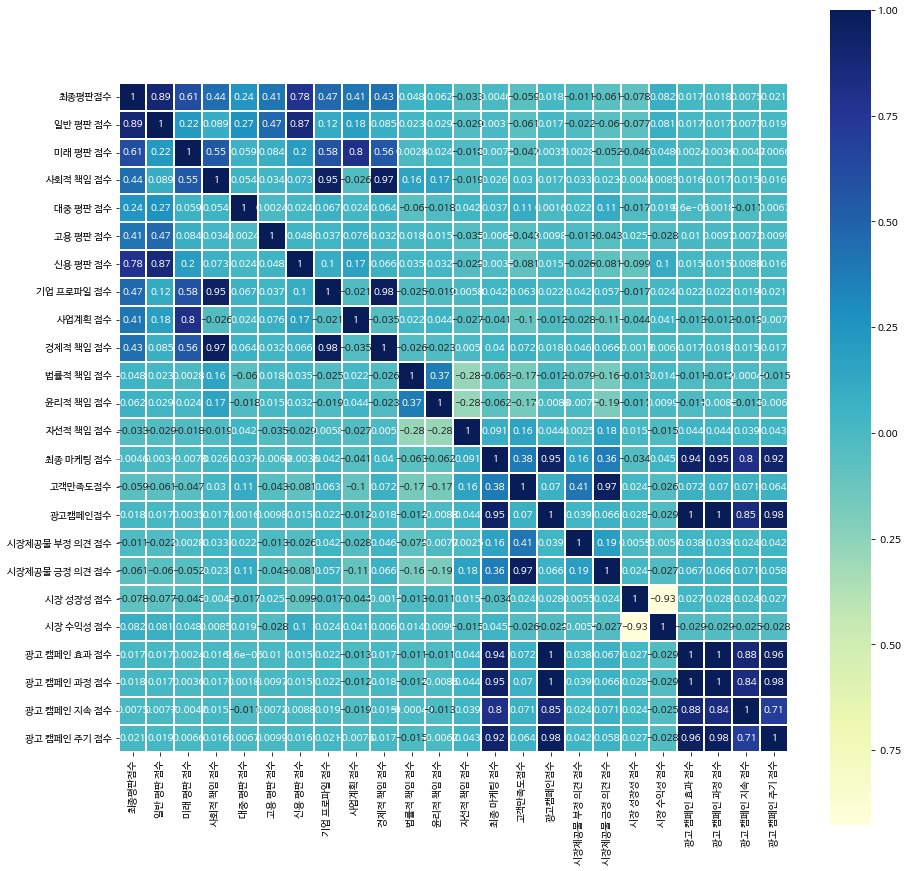

In [7]:
def get_data_input(idx):
  name = source_dict[idx]
  return src_dict[name.split('.')[0]]

input_1, input_2 = get_data_input(4),get_data_input(6) # ex) 4:평판정보 6: 마케팅 역량 정보
abd = AnalysisBigData(input_1, input_2)

# 분석 프로세스

In [9]:
X,y = abd.get_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## XGBoost

In [10]:
model_xg = XGBRegressor(objective='reg:squarederror')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

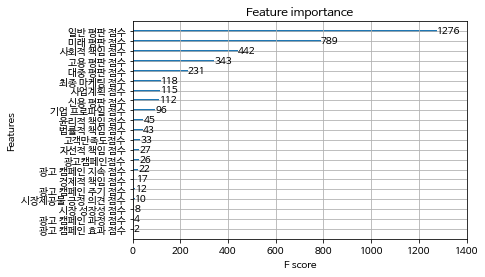

In [11]:
model_xg.fit(X_train, y_train)
plot_importance(model_xg)

In [12]:
pred_y = model_xg.predict(X_test)

In [13]:
mean_squared_error(y_test,pred_y)

0.0756515009802197

## RandomForest

In [14]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_y = model_rf.predict(X_test)
mean_squared_error(y_test,pred_y)

0.12826166640157338

## lightGBM - 데이터 숫자가 적으면 오버피팅 우려가 큼

In [15]:
import lightgbm as lgb

train_ds = lgb.Dataset(X_train, label = y_train)
test_ds = lgb.Dataset(X_test, label = y_test)
params = {'learning_rate': 0.01,
          'max_depth': 16,
          'boosting': 'dart',# 'gbdt', 'rf', 'dart','goss'
          'objective': 'regression',
          'metric': 'mse',
          'is_training_metric': True,
          'num_leaves': 144,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'seed':2020}

model = lgb.train(params, train_ds, 10000, test_ds, verbose_eval=100, early_stopping_rounds=100)
y_pred=model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 4008, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 55.638466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f674006ca60>
Traceback (most recent call last):
  File "/home/hans/mlvenv/lib/python3.8/site-packages/lightgbm/basic.py", line 91, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [ ]:
mean_squared_error(y_test,y_pred)

0.5374677340794665